#### Student Name:
#### Student ID:


## Assignment 2 Solution

### Spectrograms, and Griffin-Lim Phase Reconstruction

Instructions: 

This notebook is an interactive assignment; please read and follow the instructions in each cell.

Assignments are to be completed individually.

Cells that require your input (in the form of code or written response) will have 'Question #' above. 

# Seeing Sound Using Spectrograms

For this portion of the assignment, you will have the chance to see your own voice!
First, make two recordings of yourself:

In the first recording, you will say a vowel sound of your choice ("ah", "ee", "oo", etc.). Try to keep the sound short (no longer than you would make the vowel sound in a typical word ("car", "see", "good"). 

In the second recording, sing (or play on an instrument) any major scale, at a tempo of 60 bpm. (Don't worry, it doesn't need to be perfect- your best effort will be great!). 

Make sure both of your recordings are saved as mono WAV files. Audacity is a great tool to quickly convert audio file formats (and convert from stereo to mono). 

In [1]:
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

##### Question 6 [5 points]

In [2]:
from scipy.io import wavfile
import numpy as np
from matplotlib import pyplot as plt

### Modify the line below with your WAV file:
sample_rate, input_signal = wavfile.read("./vowel_ah.wav")
time_array = np.arange(0, len(input_signal)/sample_rate, 1/sample_rate)

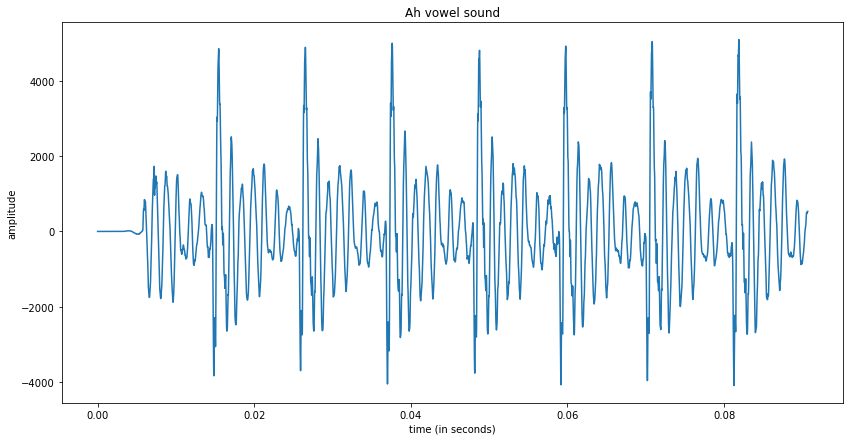

In [3]:
setup_graph(title='Ah vowel sound', x_label='time (in seconds)', y_label='amplitude', fig_size=(14,7))
_ = plt.plot(time_array[0:4000], input_signal[0:4000])

##### Question 7 [5 points]

The FFT of your input signal is complex valued (real and imaginary components). 
To visualize the output of the FFT of your input signal, we will calculate the magnitude of the FFT output.
In your code, you may want to make use of the .real and .imag members of the numpy complex128 class as you explore the fft_out datatype. 

86016


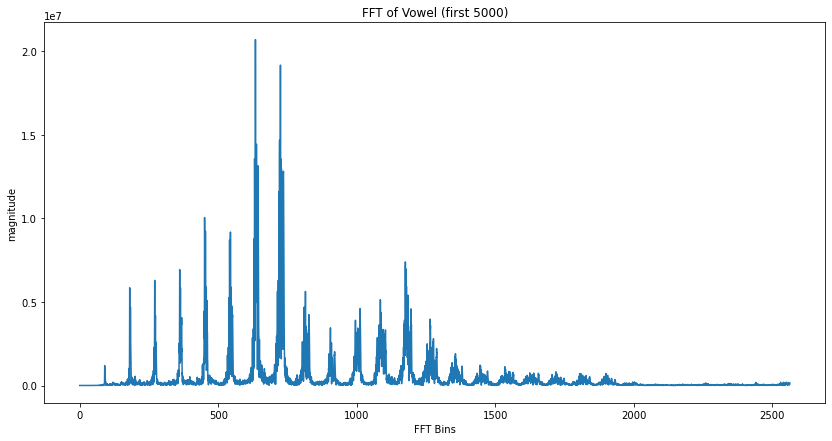

In [4]:
fft_out = np.fft.rfft(input_signal)

fft_mag = abs(fft_out)

num_samples = len(input_signal)
print(num_samples)
rfreqs = [(i*1.0/num_samples)*sample_rate for i in range(num_samples//2+1)]
setup_graph(title='FFT of Vowel (first 5000)', x_label='FFT Bins', y_label='magnitude', fig_size=(14,7))
_ = plt.plot(rfreqs[0:5000], fft_mag[0:5000])

##### Question 8 [5 points]

Would you expect another person's recording of the same vowel sound (on the same pitch and at the same volume) to have a similar FFT graph? What musical term is used to describe this quality? 

Example response: "The graphs would likely share a peak at the fundamental frequency making up the sound, however the fft would show different peaks at the overtones or harmonics that account for the differences between the individuals' voices. This characteristic is called timbre."

# Spectrogram (FFT over time)

### Axes

* x-axis: time
* y-axis: frequency
* z-axis (color): strength of each frequency

### See the Harmonics!

##### Question 9 [5 points]

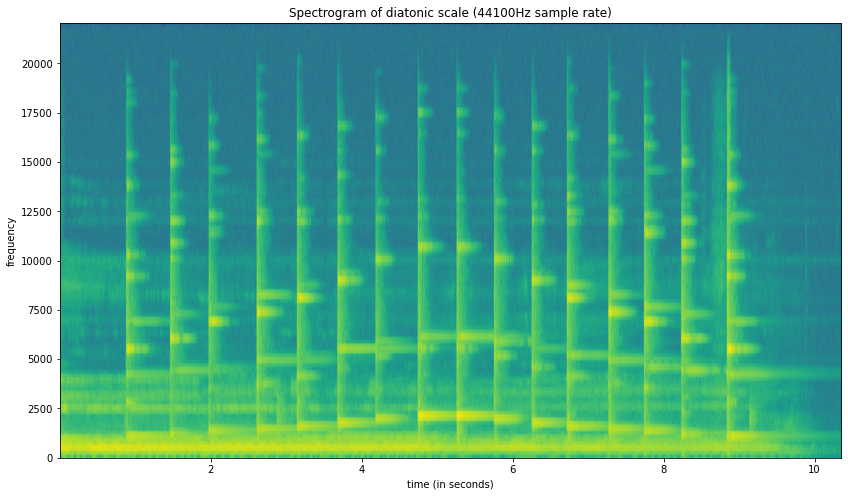

In [5]:
### Modify the line below:
sample_rate, sample = wavfile.read("ohm_scale.wav")

setup_graph(title='Spectrogram of diatonic scale (%dHz sample rate)' % sample_rate, x_label='time (in seconds)', y_label='frequency', fig_size=(14,8))
_ = plt.specgram(sample, Fs=sample_rate)

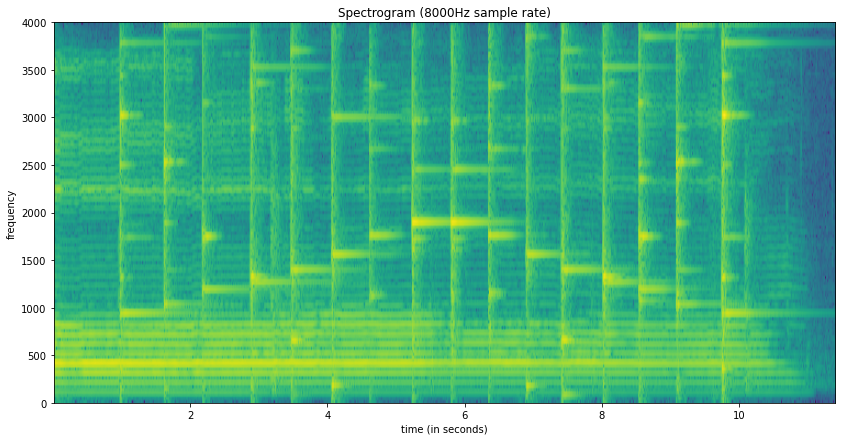

In [6]:
sample_8000hz = [sample[i] for i in range(0, len(sample), sample_rate//8000)]
setup_graph(title='Spectrogram (8000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(sample_8000hz, Fs=8000)

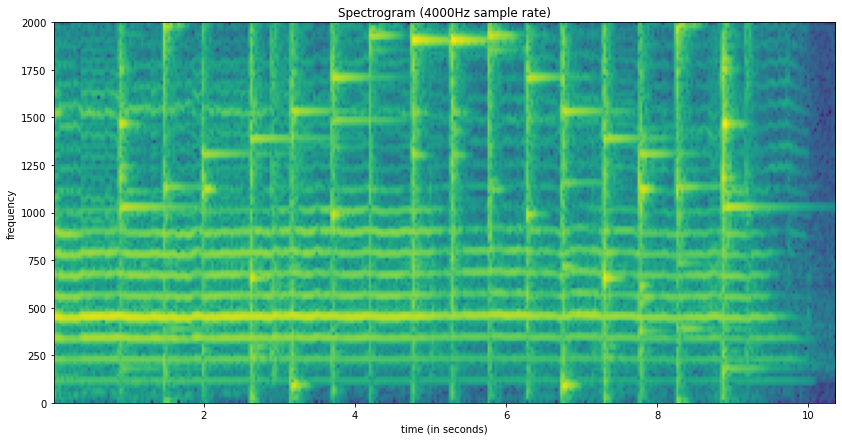

In [7]:
sample_4000hz = [sample[i] for i in range(0, len(sample), sample_rate//4000)]
setup_graph(title='Spectrogram (4000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(sample_4000hz, Fs=4000)

##### Question 6 [20 points]

Do another 1000 Hz resampling twice: once using the naive method above and second time using a proper downsampling. Plot both spectrograms. Can you detect a difference? 


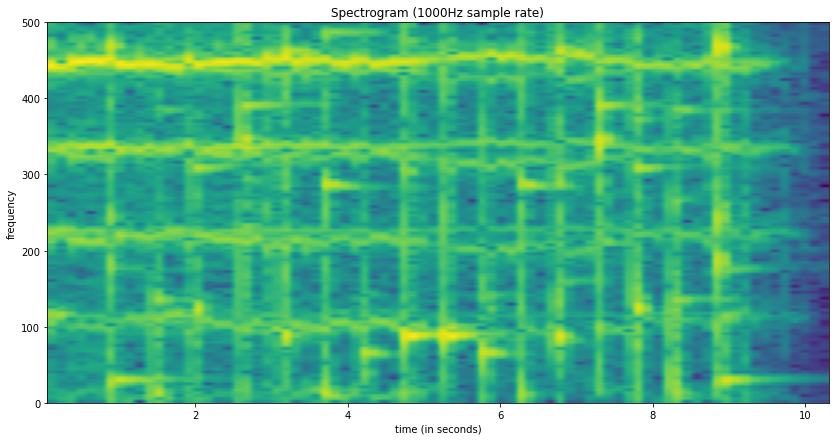

In [8]:
sample_1000hz = [sample[i] for i in range(0, len(sample), sample_rate//1000)]
setup_graph(title='Spectrogram (1000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(sample_1000hz, Fs=1000)

In [9]:
import librosa
y, sr = librosa.load("ohm_scale.wav", sr=sample_rate)
resample_1k = librosa.resample(y, orig_sr=sr, target_sr=1000)

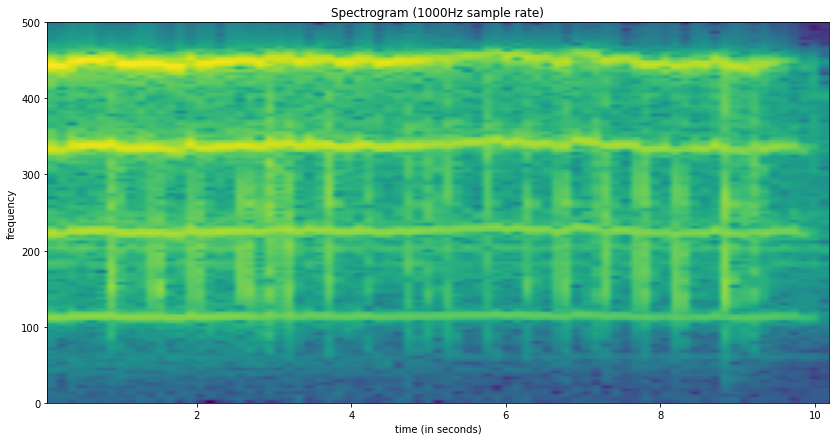

In [10]:
setup_graph(title='Spectrogram (1000Hz sample rate)', x_label='time (in seconds)', y_label='frequency', fig_size=(14,7))
_ = plt.specgram(resample_1k, Fs=1000)

##### Question 10 [5 points]

In your recording, you were singing (or playing) a single note at a time. Does this still appear to be the case when looking at the spectrogram of your recording? What are you observing? 

``` Your response here ```
Example response: No, I observe multiple frequencies present in my recording of a single note. 

##### Question 11 [5 points]

What would you expect the relationship between the first and last note on your spectrogram to be? Is this the case?  

``` Your response here ```
Example Response: I would expect the first and last note to have a relationship of doubling the frequency (octave). Yes, this is evident in my graph.

## Spectrogram inversion from spectral amplitude

Short-time Fourier Transform (STFT) analysis takes short snapshots of sound and represents them as a matrix of fft vectors.
As we saw above, the fft is a complex transform that contain information about amplitude and phase of each frequency component. In many applications we choose to discard the phases and use the amplitudes only. 

One challenge is to reconstruct the original waveform from amplitude information only.

For these questions, we will explore an iterative method by Griffin and Lim.

Let's start with creating spectral amplitudes of your earlier vowel WAV file:

##### Question 12 [5 points]

22050


/anaconda2/envs/Python37/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Pass n_fft=2048 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


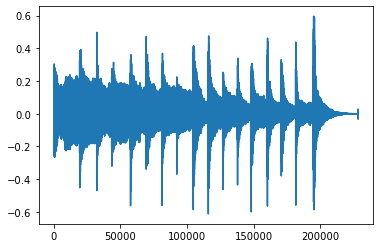

In [11]:
# Reads wav file and produces spectrum
# Fourier phases are ignored

def wave_to_spectum(x, n_fft):
    S = librosa.stft(x, n_fft,center = False)
    p = np.angle(S)   
    A = np.log1p(np.abs(S))  
    return A

### Replace the string below with your file:
filename = 'ohm_scale.wav'
x, fs = librosa.load(filename)
print(fs)
n_fft = 2048
plt.plot(x)
SA = wave_to_spectum(x, n_fft)

In [12]:
import IPython 
IPython.display.Audio(data=x, rate=fs)

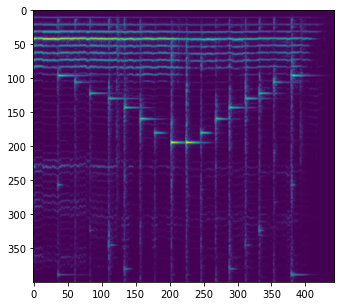

In [13]:
plt.figure(figsize=(15,5))
plt.imshow(SA[:400,:])
plt.show()

## Griffin and Lim method

In the next code block, you will implement the Griffin and Lim iterative method for phase reconstruction.
Please look over the pseudocode available on pg. 1865 of Wakabayashi & Ono's 2019 paper, available at http://www.apsipa.org/proceedings/2019/pdfs/290.pdf

The random phase initialization is provided as p. Please use 1000 iterations for your reconstruction. 

You may find the librosa functions istft and stft helpful in your implementation. 

##### Question 13 [15 points]

In [15]:
from numpy.linalg import norm

def write_spectrum_wav(a, N_FFT):
    # Given input amplitude a, return reconstructed signal x using the Griffin & Lim iterative method. 
    p = 2 * np.pi * np.random.random_sample(a.shape) - np.pi
    '''
    YOUR IMPLEMENTATION HERE
    '''
    a = np.exp(a)-1 #This is the inverse of A = np.log1p(np.abs(S)) in wave_to_spectum
    
    iter = 1000
    dx = 1
    for i in range(iter):
        S = a * np.exp(1j*p)
        x = librosa.istft(S)
        p = np.angle(librosa.stft(x, N_FFT))
        if i == 0:
            x_old = x
        else:
            dx = norm(x-x_old)
            x_old = x
        if dx < 0.0001:
            break
        if i %100 == 0: 
            print(i, 'iterations completed')
            print('distorion', dx)
    return x
    
x_out = write_spectrum_wav(SA, n_fft)

/anaconda2/envs/Python37/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Pass n_fft=2048 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  app.launch_new_instance()


0 iterations completed
distorion 1
100 iterations completed
distorion 0.2035861577114458
200 iterations completed
distorion 0.1411473096610486
300 iterations completed
distorion 0.05524705967442003
400 iterations completed
distorion 0.0410574015338946
500 iterations completed
distorion 0.036423262849672164
600 iterations completed
distorion 0.03138118517128329
700 iterations completed
distorion 0.027646695452430786
800 iterations completed
distorion 0.025567221822217684
900 iterations completed
distorion 0.023686076028735525


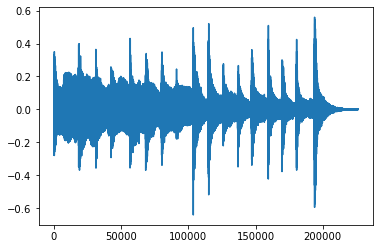

In [16]:
plt.plot(x_out)

If we had the phase, we could have used the istft and get a perfect reconstruction.

/anaconda2/envs/Python37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass n_fft=2048 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


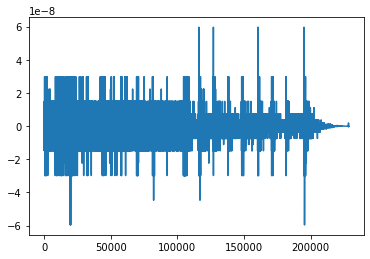

In [17]:
S = librosa.stft(x, n_fft)
x_hat = librosa.istft(S)
plt.plot(x-x_hat)

Now we can compare your reconstruction to the original signal, both auditorily and visually: 

In [18]:
IPython.display.Audio(data=x_hat, rate=fs)

In [19]:
OUTPUT_FILENAME = 'out.wav'
import soundfile as sf
sf.write(OUTPUT_FILENAME, x_out, fs)
IPython.display.Audio(data=x_out, rate=fs)

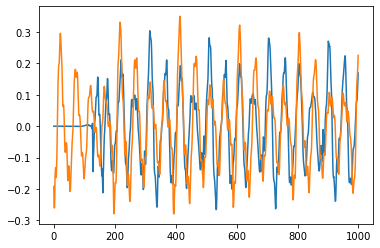

In [20]:
plt.plot(x[:1000])
plt.plot(x_out[:1000])

The Griffin and Lim method is not a perfect reconstruction.
Let's compare this to directly inverting the complex specta from STFT:

/anaconda2/envs/Python37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Pass n_fft=2048 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """Entry point for launching an IPython kernel.


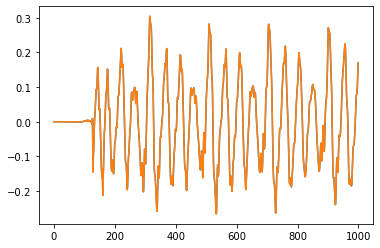

In [21]:
S = librosa.stft(x, n_fft)
x_inv = librosa.istft(S, win_length=n_fft)
plt.plot(x[:1000])
plt.plot(x_inv[:1000])